# Problem 2-3 & 2-4

## Basic Setup

In [1]:
rm(list=ls()) # clear workspace library(igraph)

# call igraph
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



## Random walk function

In [2]:
create_transition_matrix = function (g){
  
  # WARNING: make sure your graph is connected (you might input GCC of your graph)
  
  vs = V(g)
  n = vcount(g)
  adj = as_adjacency_matrix(g)
  adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
  z = matrix(rowSums(adj, , 1))
  
  transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
  
  return(transition_matrix)
}

In [3]:
# create a random walk
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
  if(is.null(transition_matrix))
    transition_matrix = create_transition_matrix(g)
  
  v <- start_node
  path <- c()
  for(i in 1:num_steps){
    #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
    PMF <- transition_matrix[v, ];
    v <- sample(1:vcount(g), 1, prob = PMF);
    path[i] <- v;
  }
  
  return(path)
}

### Generate PA Model

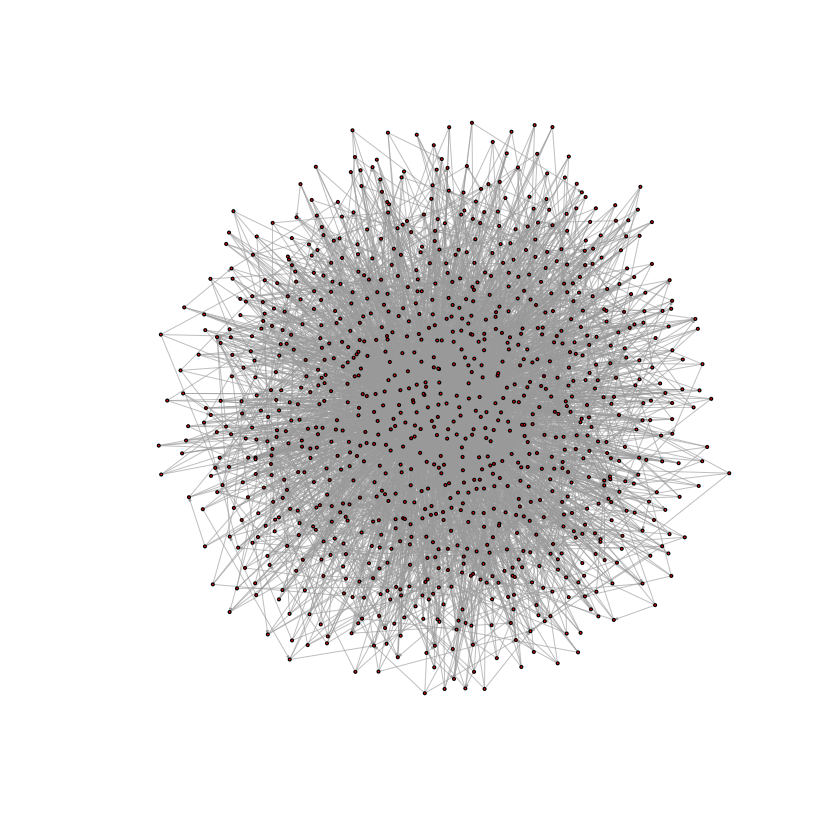

In [5]:
# gengerate network with PA model
set.seed(0)
g = barabasi.game(1000, m=4, directed = TRUE)
plot(g,vertex.size=1,vertex.label=NA, vertex.color="red",
     edge.width=0.5,edge.arrow.size=0.1)
#print(create_transition_matrix(g))

In [7]:
# helper functuions
walk_ender = function(path){
  # find out the end of walking and drop tail
  new_path <- c();
  for (i in seq(1,length(path))){
    new_path[i] <- path[i];
    if (path[i] == path[i + 1]){
      break;
    }
  }
  return(new_path)
}

# calculate degree
cal_degree = function(g, option="all"){
  num_vertex <- length(V(g));
  degree_list <- c();
  for (i in seq(1, num_vertex)){
    degree_list[i] <- degree(graph=g,v=i,mode=option);
  }
  
  degree_df <- data.frame("vertex"=seq(1,num_vertex), "degree"=degree_list);
  return(degree_df);
}

# calculate page rank
calc_pgrank = function(graph, num_step, num_exp){
  sum_path <- c();
  start_node <- as.integer(runif(num_exp,min=1,max=length(V(graph))+1));
  # do num_step experimemnts
  for (i in seq(1,num_exp)){
    path <- random_walk(graph, start_node=start_node[i], num_steps=num_step);
    new_path <- walk_ender(path);
    sum_path <- append(sum_path,new_path);
    #print(i)
  }
  
  prob_vertex <- table(sum_path) / length(sum_path);
  prob_vertex_df <- as.data.frame(prob_vertex);
  names(prob_vertex_df) <- c("vertex","probablity");
  
  return(prob_vertex_df)
}

In [8]:
prob_vertex_df <- calc_pgrank(graph=g, num_step=1000, num_exp=1000);
degree_df <- cal_degree(g);
sum_df <- merge(degree_df, prob_vertex_df, by="vertex");

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

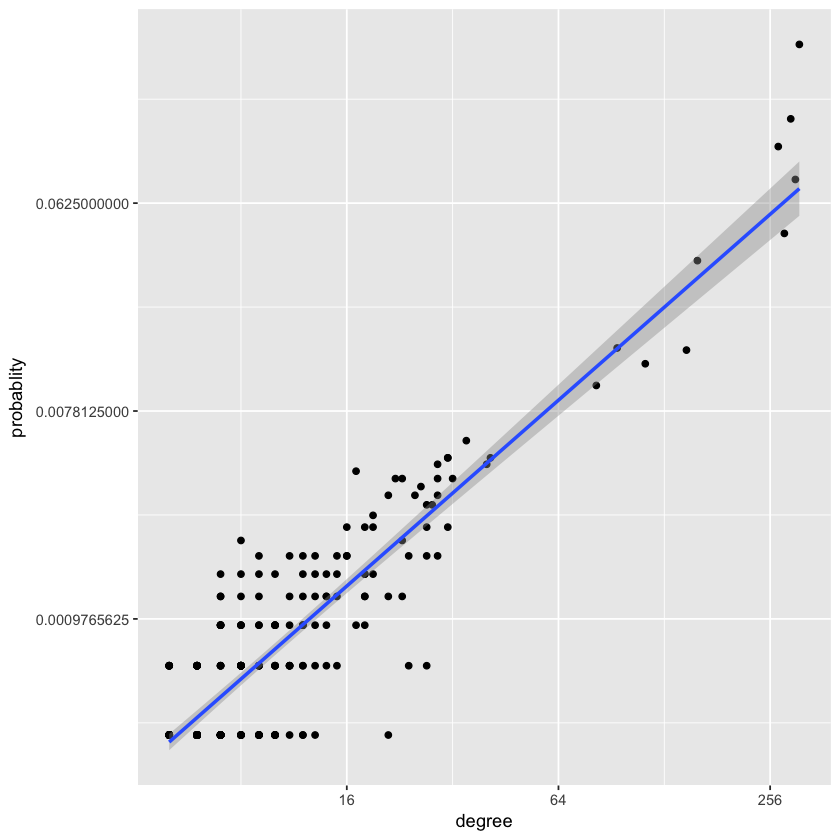

In [9]:
library("ggplot2")
p <- ggplot(sum_df, aes(x=degree,y=probablity), alpha=0.5) + geom_point()
p <- p + scale_x_continuous(trans='log2') + scale_y_continuous(trans='log2');
p <- p + geom_smooth(method=lm);
p

## Solution to Problem 3-2

In [10]:
teleport = function (g, num_steps, start_node, alpha = 0.15){
  # a simple implementation of teleportation
  transition_matrix <- create_transition_matrix(g);
  num_vertex <- length(V(g)); # number of vertex
  
  v <- start_node;
  path <- c()
  for(i in 1:num_steps){
    deg <- degree(g, v, mode="out");
    if (deg == 0){
      # if it is in dead end
      v <- as.integer(runif(1, min=1, max=num_vertex+1));
      path[i] <- v;
    }
    else{
      # or not dead
      rand_incident <- runif(1, min = 0, max = 1);
      if (rand_incident >= alpha){
        PMF <- transition_matrix[v, ];
        v <- sample(1:vcount(g), 1, prob = PMF);
        path[i] <- v;
      }
      else{
        # w/ prob.=alpha, jump to random page
        v <- as.integer(runif(1, min=1, max=num_vertex+1));
        path[i] <- v;
    }
  }
  }
  
  return(path)
}

calc_tele = function(graph, num_step, num_exp, alpha){
  sum_path2 <- c();
  start_node <- as.integer(runif(num_exp,min=1,max=length(V(graph))+1));
  # do 10000 experimemnts
  for (i in seq(1,num_exp)){
    path <- teleport(graph, start_node=start_node[i], num_steps=num_step, alpha=alpha);
    sum_path2 <- append(sum_path2,path);
    #print(i)
  }
  
  prob_vertex2 <- table(sum_path2) / length(sum_path2);
  prob_vertex_df2 <- as.data.frame(prob_vertex2);
  names(prob_vertex_df2) <- c("vertex","probablity");
  
  return(prob_vertex_df2)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

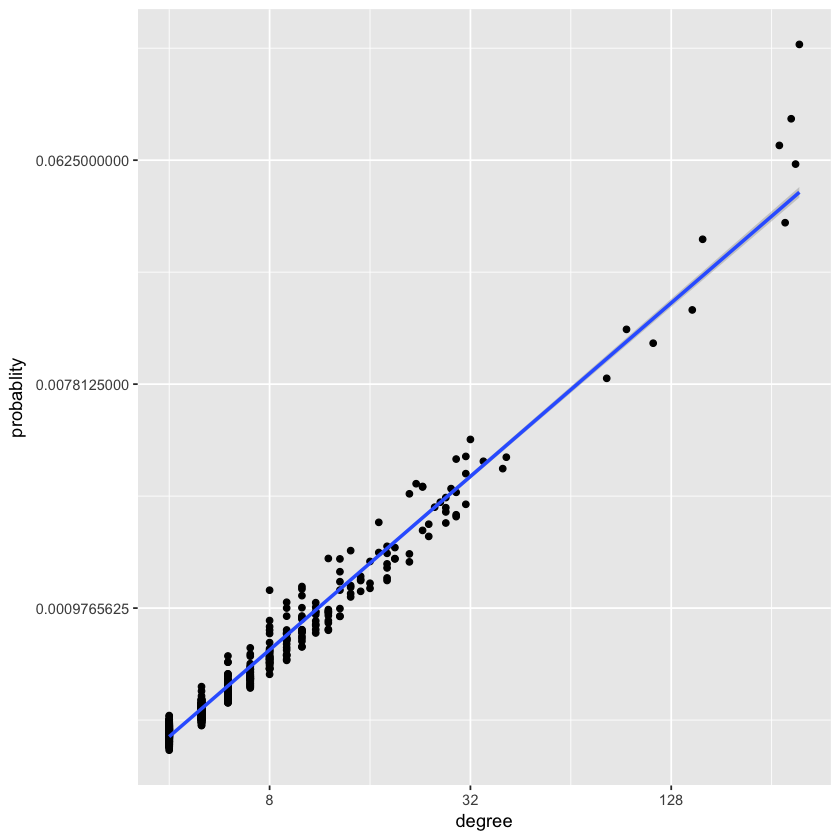

In [11]:
prob_vertex_df2 <- calc_tele(graph=g, num_step=1000, num_exp=1000, alpha=0.15);
degree_df2 <- cal_degree(g);
sum_df2 <- merge(degree_df2, prob_vertex_df2, by="vertex");

library("ggplot2")
p <- ggplot(sum_df2, aes(x=degree,y=probablity), alpha=0.5) + geom_point()
p <- p + scale_x_continuous(trans='log2') + scale_y_continuous(trans='log2');
p <- p + geom_smooth(method=lm);
p

## Solution to Problem 4-1

In [12]:
norm_rank_df <- calc_tele(graph=g, num_step=1000, num_exp=1000, alpha=1/length(V(g)));

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [13]:
personized_pr = function (graph, num_steps, start_node, alpha_set, prop=1){
  # a simple implementation of teleportation
  transition_matrix <- create_transition_matrix(g);
  num_vertex <- length(V(graph)); # number of vertex
  
  v <- start_node;
  path <- c()
  for(i in 1:num_steps){
    deg <- degree(graph, v, mode="out");
    if (deg == 0){
      # if it is in dead end
      v <- as.integer(runif(1, min=1, max=num_vertex+1));
      path[i] <- v;
    }
    else{
      # or not dead
      rand_incident <- runif(1, min = 0, max = 1);
      # calculate alpha of vertex
      alpha <- norm_rank_df$probablity[norm_rank_df$vertex == 10];
      alpha <- alpha * prop;
      if (rand_incident >= alpha){
        PMF <- transition_matrix[v, ];
        v <- sample(1:vcount(graph), 1, prob = PMF);
        path[i] <- v;
      }
      else{
        # w/ prob.=alpha, jump to random page
        v <- as.integer(runif(1, min=1, max=num_vertex+1));
        path[i] <- v;
      }
    }
  }
  
  return(path)
}

In [14]:
calc_tele_personized = function(graph, num_step, num_exp, alpha, prop=1){
  sum_path <- c();
  start_node <- as.integer(runif(num_exp,min=1,max=length(V(graph))+1));
  # do 10000 experimemnts
  for (i in seq(1,num_exp)){
    path <- personized_pr(graph, start_node=start_node[i], num_steps=num_step, alpha_set=alpha, prop=prop);
    sum_path <- append(sum_path,path);
    #print(i)
  }
  
  prob_vertex <- table(sum_path) / length(sum_path);
  prob_vertex_df <- as.data.frame(prob_vertex);
  names(prob_vertex_df) <- c("vertex","probablity");
  
  return(prob_vertex_df)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

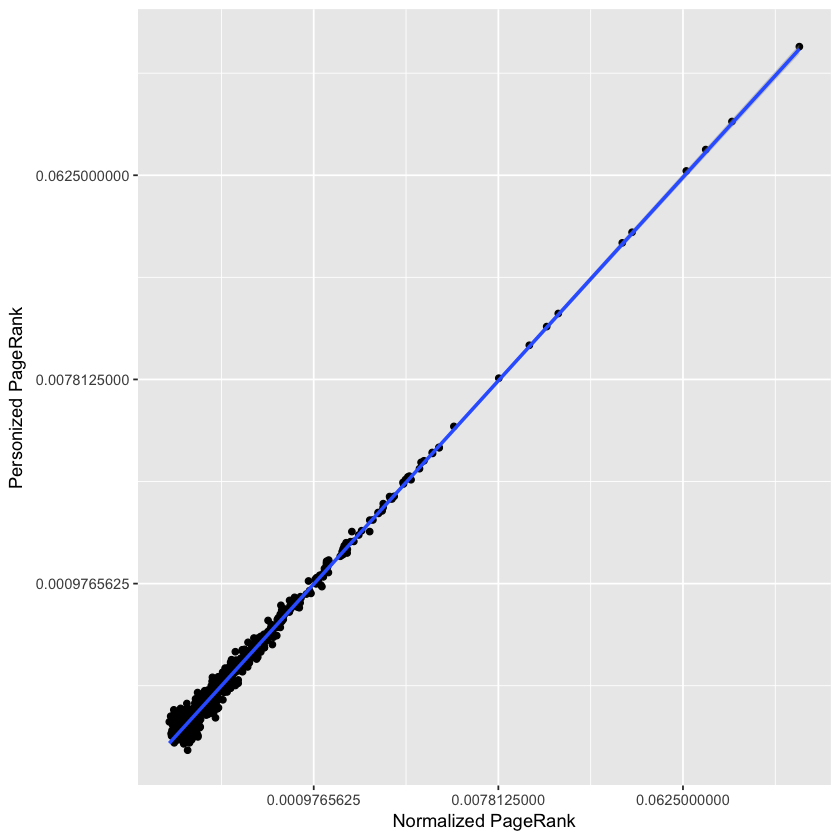

In [15]:
personized_rk_df <- calc_tele_personized(g, num_step=1000, num_exp=1000, alpha=norm_rank_df, prop=0.5);
new_df <- merge(norm_rank_df, personized_rk_df, by="vertex");

# plot
p <- ggplot(new_df, aes(x=probablity.x,y=probablity.y), alpha=0.5) + geom_point()
p <- p + scale_x_continuous(trans='log2') + scale_y_continuous(trans='log2');
p <- p + geom_smooth(method=lm);
p <- p + labs(x="Normalized PageRank", y="Personized PageRank")
p

## Solution to Problem 4-2

In [16]:
v1 <- sum_df2$vertex[sum_df2$probablity == sort(sum_df2$probablity)[500]][1];
v2 <- sum_df2$vertex[sum_df2$probablity == sort(sum_df2$probablity)[501]][1];
v_list <- c(v1, v2);

In [17]:
personized_pr_mod = function (graph, num_steps, start_node, alpha_set, prop=1, v_list){
  # a simple implementation of teleportation
  transition_matrix <- create_transition_matrix(g);
  num_vertex <- length(V(graph)); # number of vertex
  
  v <- start_node;
  path <- c()
  for(i in 1:num_steps){
    deg <- degree(graph, v, mode="out");
    if (deg == 0){
      # if it is in dead end
      v <- as.integer(runif(1, min=1, max=num_vertex+1));
      path[i] <- v;
    }
    else{
      # or not dead
      rand_incident <- runif(1, min = 0, max = 1);
      # calculate alpha of vertex
      alpha <- norm_rank_df$probablity[norm_rank_df$vertex == 10];
      alpha <- alpha * prop;
      # change median vertex prob.
      if (v %in% v_list){
        alpha <- 0.5;
      }
      if (rand_incident >= alpha){
        PMF <- transition_matrix[v, ];
        v <- sample(1:vcount(graph), 1, prob = PMF);
        path[i] <- v;
      }
      else{
        # w/ prob.=alpha, jump to random page
        v <- as.integer(runif(1, min=1, max=num_vertex+1));
        path[i] <- v;
      }
    }
  }
  
  return(path)
}

In [18]:
calc_tele_personized_mod = function(graph, num_step, num_exp, alpha, prop=1, v_list){
  sum_path <- c();
  start_node <- as.integer(runif(num_exp,min=1,max=length(V(graph))+1));
  # do 10000 experimemnts
  for (i in seq(1,num_exp)){
    path <- personized_pr_mod(graph, start_node=start_node[i], num_steps=num_step,
                              alpha_set=alpha, prop=prop,v_list=v_list);
    sum_path <- append(sum_path,path);
    #print(i)
  }
  
  prob_vertex <- table(sum_path) / length(sum_path);
  prob_vertex_df <- as.data.frame(prob_vertex);
  names(prob_vertex_df) <- c("vertex","probablity");
  
  return(prob_vertex_df)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

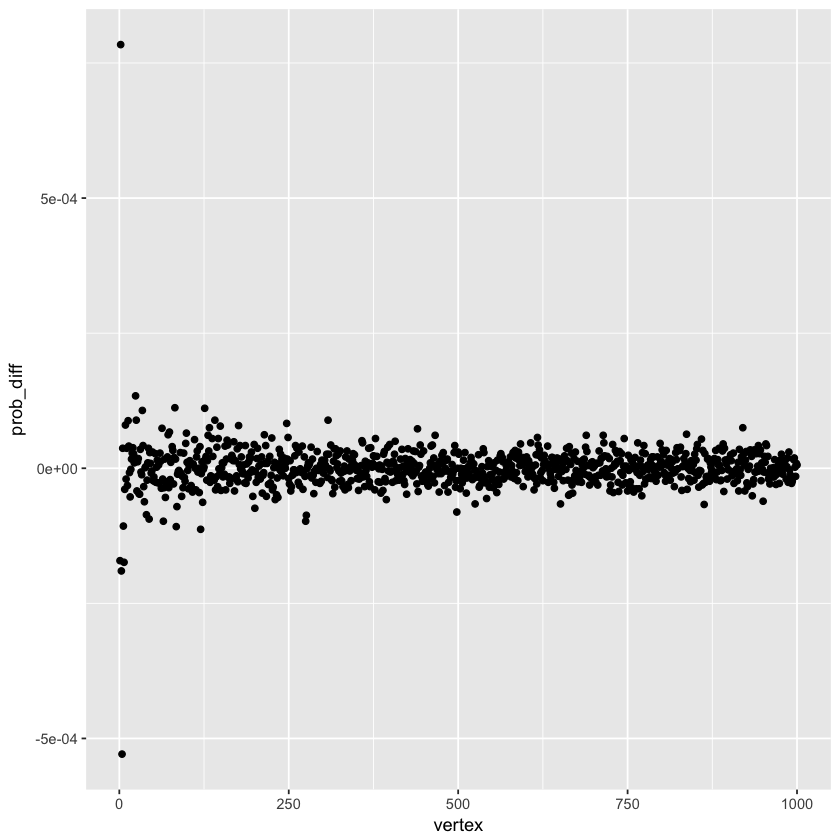

In [19]:
new_pr <- calc_tele_personized_mod(g, num_step=1000, num_exp=1000,
                                   alpha=norm_rank_df, prop=0.5, v_list=v_list);

diff_pr = function(df1, df2){
  df_merged <- merge(df1, df2, by="vertex");
  diff <- df_merged$probablity.x - df_merged$probablity.y;
  df_merged <- data.frame(df_merged, "diff" = diff);
  names(df_merged) <- c("vertex","df_1","df_2","prob_diff");
  return(df_merged);
}

diff_newpr_newdf <- diff_pr(new_pr, personized_rk_df);
diff_newpr_newdf$vertex <- as.numeric(diff_newpr_newdf$vertex);

p <- ggplot(diff_newpr_newdf, aes(x=vertex,y=prob_diff)) + geom_point()
p